In [1]:
%pip install -q numpy matplotlib opencv-python ipympl 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import cv2 as cv

# Punctual Image Transforms

The lab goal is to achieve punctual image transforms.

## Look Up Table (LUT)

### LUT to display a simple matrix

In order to display in color a gray image, 
we can use a LUT which associates to each gray scalar level a RGB vector. 

**Question:**

How many colors are necessary for the LUT of a gray level image coded by using 8 bits? 


**Response:** 256 colors (0-255)

Run the python code that follows, 
and focus on the 2 methods _imshow()_ et _colorbar()_.

**Note about the used Python libraries:** 
- _numpy_ permits the matrix and array manipulation.
- _matplotlib_ is for the graphical display of data, and its _widget_ adds a lateral bar.


[[5 5 1]
 [1 2 2]
 [3 3 5]]


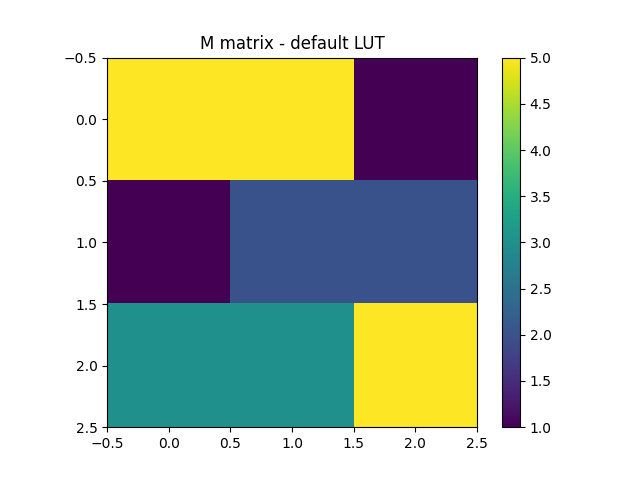

In [3]:
M = np.array([[5, 5, 1],[1, 2, 2],[3, 3, 5]])
print(M)

plt.figure()
plt.title('M matrix - default LUT')
plt.imshow(M)
plt.colorbar()

**Question:**

Explain how these 2 methods work here.

**Response:**

_imshow()_: Displays a matrix as an image, coloring in using a LUT.

_colorbar()_: Displays the corresponding colors mapped to each value as a bar next to the image.

### LUT of a gray level image

Write a python code in order to:
* load with _imread()_ the _cameraman.tif_ image (it's a "gray level" image)
* display the image size by using _shape()_
* display the pixels type by using _dtype_ 
* display it with _imshow()_ and _cmap_ in gray
* display it by using the LUT called _spring_
* each time display with _colormap()_ also the used LUT 


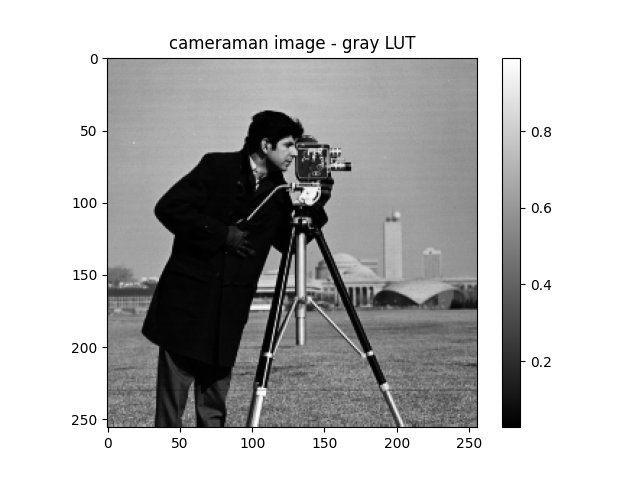

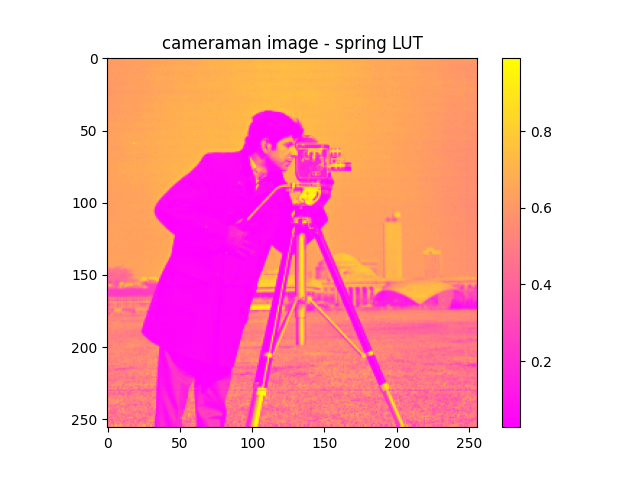

In [11]:

im = plt.imread('../standard_test_images/cameraman.png')

# image size and pixel type 
im.shape
im.dtype

# Display
plt.figure()
plt.title('cameraman image - gray LUT')
plt.imshow(im, cmap="gray")
plt.colorbar()

plt.figure()
plt.title('cameraman image - spring LUT')
plt.imshow(im, cmap="spring")
plt.colorbar()

**Question:**

Explain how we can display in gray on a color screen? 
What is the corresponding LUT? 


**Response:** In RGB, all values with equal red, green and blue values are grayscale values.

### Inverse gray LUT 

A "gray LUT" displays such as to the 0 level corresponds a  black pixel and to the 255 level corresponds a white pixel (with all the intermediary grays between 0 and 255).    

An "inverse gray LUT" do the opposite: it displays such as to the 0 level corresponds a  white pixel and to the 255 level corresponds a black pixel (with all the intermediary inverse grays between 0 and 255).   

Write the python code in order to:
* load the _cameraman.tif_ image and display by using your **own** gray LUT.
* load the _cameraman.tif_ image and display by using your **own** inverse gray LUT.


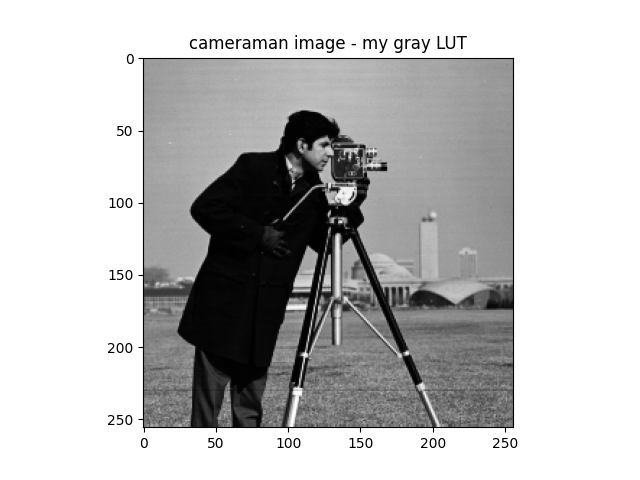

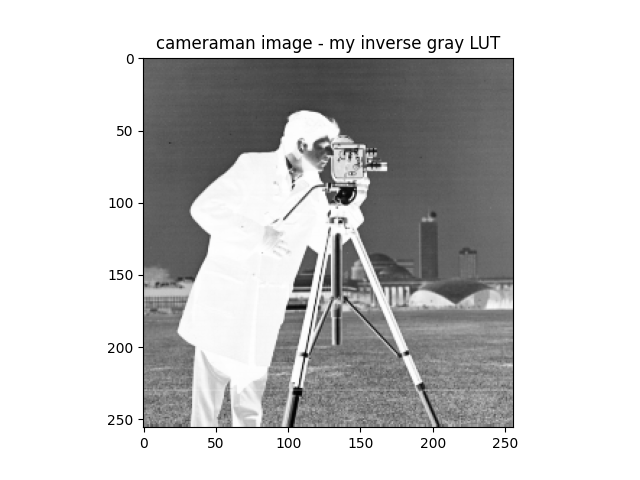

In [12]:
# RAZ (figures closing)
plt.close('all')

# Design of the gray LUT
my_gray_lut = np.zeros((256, 3))

for value in range(0, 256):
    pixel_value = value/255
    my_gray_lut[value] = [pixel_value, pixel_value, pixel_value]

# Display by using the designed gray LUT
plt.figure()
plt.title('cameraman image - my gray LUT')
plt.imshow(im, cmap=plt.cm.colors.ListedColormap(my_gray_lut))
plt.show()
plt.colorbar()

# Design of the inverse gray LUT
my_inverse_gray_lut = np.zeros((256, 3))
for value in range(0, 256):
    pixel_value = (255-value)/255
    my_inverse_gray_lut[value] = [pixel_value, pixel_value, pixel_value]

# Display by using the designed gray LUT
plt.figure()
plt.title('cameraman image - my inverse gray LUT')
plt.imshow(im, cmap=plt.cm.colors.ListedColormap(my_inverse_gray_lut))
plt.show()
plt.colorbar()

### Another designed LUT 

Design a LUT in order to display a monochrome image such as : 

- the gray levels below 50 are displayed in red,
- those higher to 150 in green,
- the others are unchanged.


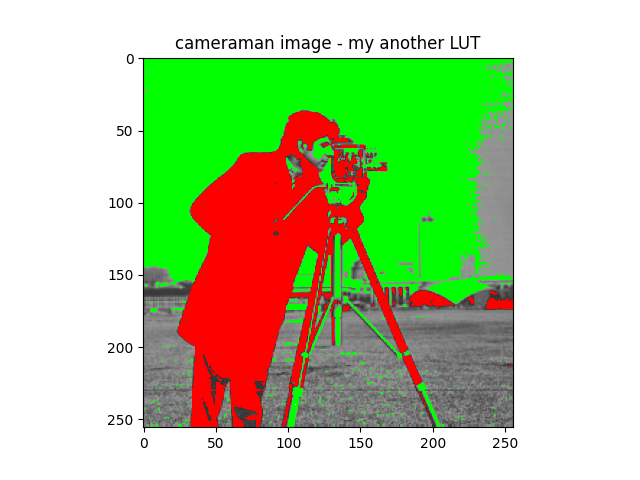

In [13]:

# RAZ (figures closing)
plt.close('all')

# Design of the LUT

## initialisation: all levels in grays
my_lut = my_gray_lut

## gray levels below 50 in red
for value in range(0,50):
    my_lut[value] = [1, 0, 0]

## levels higher to 150 in green
for value in range(151,255):
    my_lut[value] = [0, 1, 0]

# Display by using the designed LUT
plt.figure()
plt.title('cameraman image - my another LUT')
plt.imshow(im, cmap=plt.cm.colors.ListedColormap(my_lut))
plt.show()
plt.colorbar()


## Histogram of a gray level image

Compute and display (by using _hist()_) the respective histograms of these 2 monochrome images: _cameraman.tif_ and _circuit.tif_. 

Note that it is interesting to display side by side (by using _subplots()_) the gray image and its histogram.

Analyse the results.

**Your analysis:**

(array([1.590e+02, 4.180e+02, 3.431e+03, 0.000e+00, 1.416e+03, 2.460e+03,
        1.384e+03, 1.119e+03, 9.410e+02, 9.590e+02, 1.994e+03, 8.740e+02,
        8.270e+02, 7.790e+02, 8.150e+02, 1.526e+03, 6.500e+02, 7.080e+02,
        7.060e+02, 7.950e+02, 1.757e+03, 9.250e+02, 8.830e+02, 7.860e+02,
        7.180e+02, 1.469e+03, 7.080e+02, 7.380e+02, 6.890e+02, 6.610e+02,
        1.257e+03, 6.340e+02, 6.720e+02, 7.240e+02, 6.520e+02, 1.310e+03,
        6.760e+02, 7.360e+02, 6.670e+02, 5.810e+02, 1.134e+03, 0.000e+00,
        9.600e+02, 4.730e+02, 4.220e+02, 8.540e+02, 0.000e+00, 9.190e+02,
        4.840e+02, 5.100e+02, 9.540e+02, 0.000e+00, 8.180e+02, 3.950e+02,
        4.100e+02, 7.650e+02, 0.000e+00, 7.780e+02, 4.170e+02, 3.870e+02,
        4.370e+02, 4.130e+02, 8.050e+02, 3.700e+02, 3.440e+02, 3.330e+02,
        3.290e+02, 6.690e+02, 3.490e+02, 3.370e+02, 3.400e+02, 3.080e+02,
        6.690e+02, 3.920e+02, 4.030e+02, 3.760e+02, 4.270e+02, 8.310e+02,
        4.900e+02, 4.780e+02, 5.160e+0

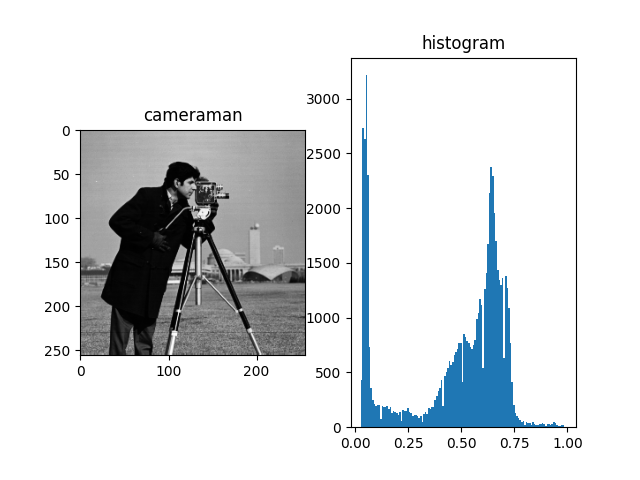

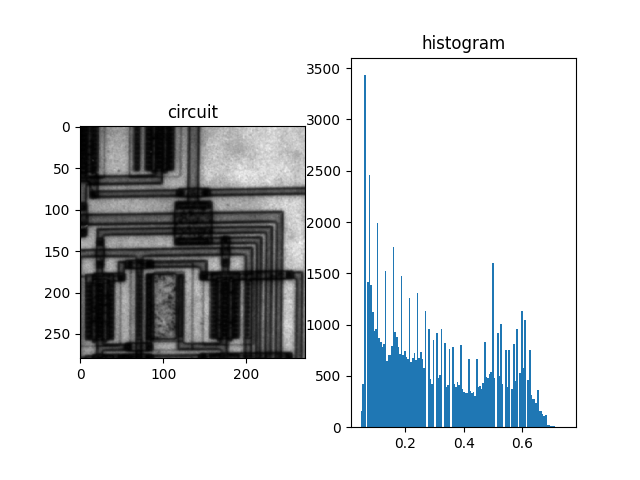

In [14]:

# RAZ (figures closing)
plt.close('all')

# For image 1 

## image reading
im1 = plt.imread('../standard_test_images/cameraman.png')

## transformation: 2D array -> 1D array
x1 = im1.flatten() 

## histogram & display 

fig, axs = plt.subplots(1, 2)
axs[0].title.set_text('cameraman')
axs[0].imshow(im1,cmap='gray')
axs[1].title.set_text('histogram')
axs[1].hist(x1,bins=128); # here 128 bins are used

# For image 2 

## image reading
im2 = plt.imread('../standard_test_images/circuit.png')

## transformation: 2D array -> 1D array
x2 = im2.flatten()

## histogram & display 
fig, axs = plt.subplots(1, 2)
axs[0].title.set_text('circuit')
axs[0].imshow(im2,cmap='gray')
axs[1].title.set_text('histogram')
axs[1].hist(x2,bins=128)



## Histogram of a color image

For a color image which is composed of three plans, 
respectively (R, G, B), usually the histogram of each component is computed separately.

Read the color image _avion.bmp_ and display it. Check the size of the array. 

Decompose the color image, 
get its three respective (R, G and B) plans, 
and display them separately (in gray). 
 
Compute and display the histogram of each of these plans. 

Analyse the results.

**Your analysis:**


image size = (512, 512, 3)


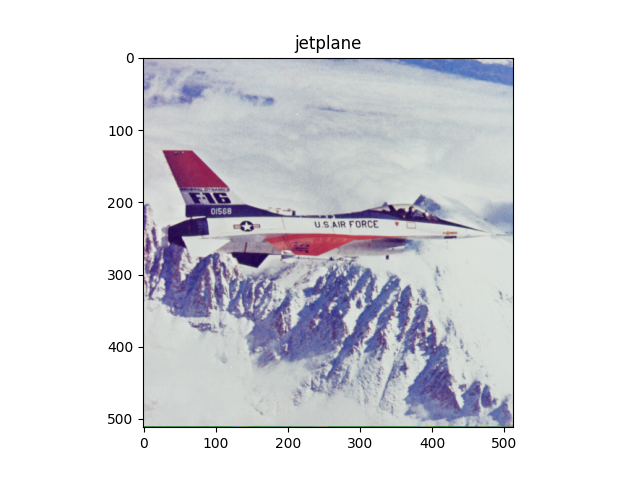

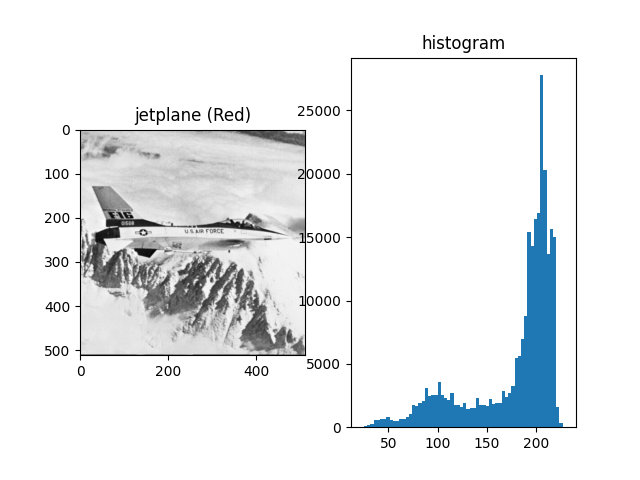

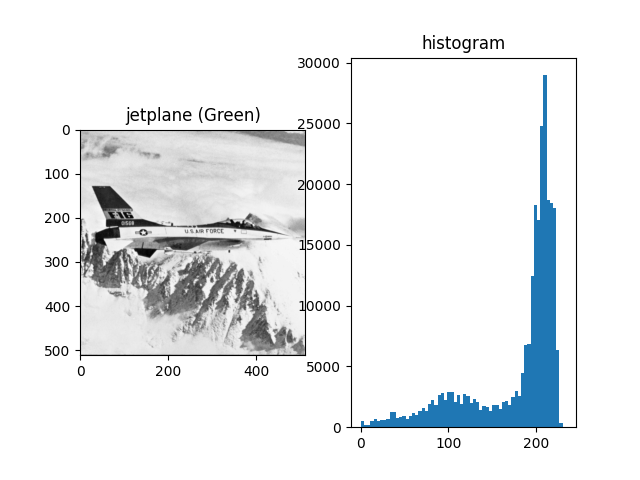

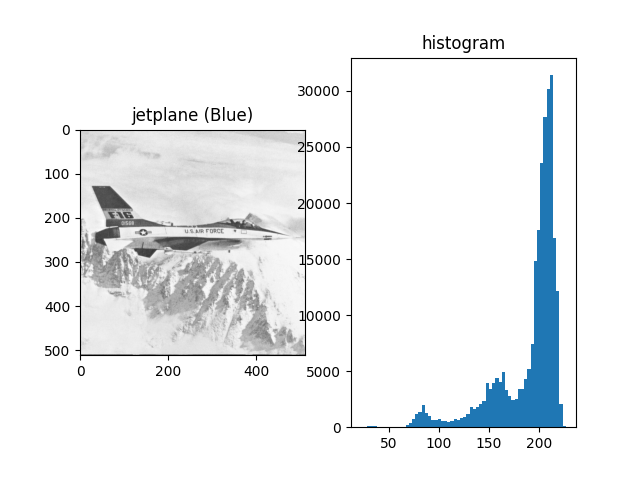

In [15]:

# RAZ (figures closing)
plt.close('all')

# image reading and display
im = plt.imread('../standard_test_images/jetplane.bmp')

plt.figure()
plt.title('jetplane')
plt.imshow(im)

# image size
print('image size =', np.shape(im) )

# decomposition in separate R, G, B plans and display of them in gray
colors = ["Red", "Green", "Blue"]
for plan in range(0, 3):
    imP = im[:,:,plan]
    xP = imP.flatten()
    fig, axs = plt.subplots(1, 2)
    axs[0].title.set_text(f'jetplane ({colors[plan]})')
    axs[0].imshow(imP,cmap='gray')
    axs[1].title.set_text('histogram')
    axs[1].hist(xP,bins=64)

## Histogram equalization of a gray image

The histogram equalization goal is to enhance the image contrast. 

Read the _cameraman.tif_ image, display its histogram. 
Equalize the latter by using the function _equalizeHist_ from the openCV library.

Display the equalized image and its histogram.

Analyse the results. 

**Your analysis:** We can notice that values that already looked similar, like the coat and gloves, become even more similar to the point of looking like the same color; However, more extreme values are even more noticeable, such as the cameraman's face or the shine on the metal of his camera becoming brighter. The contrast has been increased.

Test, type of each element: float32
Test, max of the elements: 0.99215686


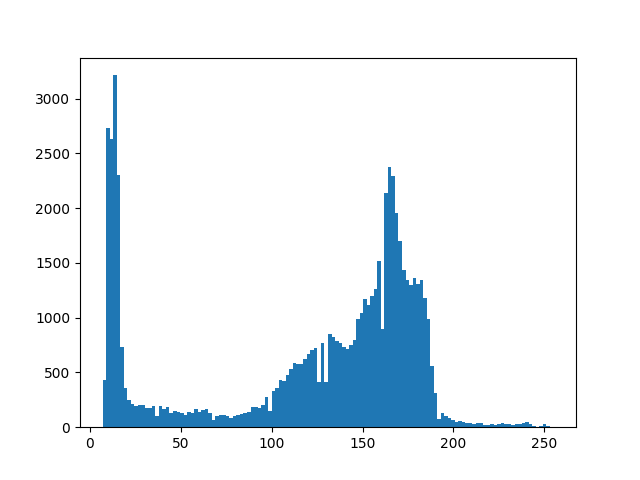

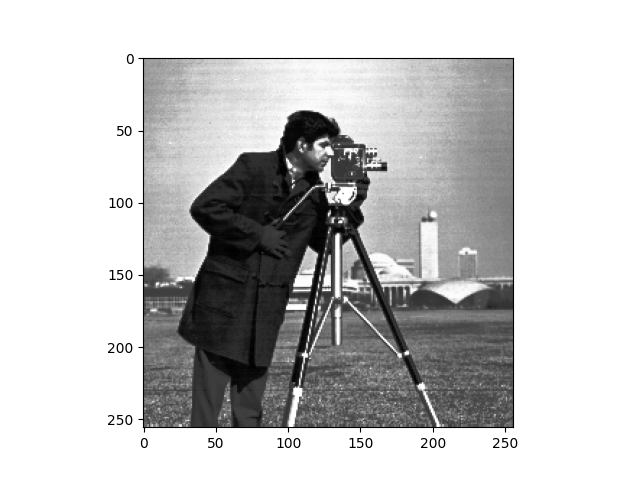

In [16]:
# RAZ (figures closing)
plt.close('all')

# Original image 

## image reading 
im = plt.imread('../standard_test_images/cameraman.png')

# ... and normalization (if necessary)
print('Test, type of each element:', im.dtype)
print('Test, max of the elements:', im.max())
im = im / im.max() # to normalize data in range 0 - 255
im = 255 * im
im = im.astype(np.uint8) # to convert them in uint8

## histogram computation & display
x = im.flatten()
plt.figure()
plt.hist(x,bins=128)

# Equalized image

## histogram equalization & display 
eq_im = cv.equalizeHist(im)
plt.figure()
plt.imshow(eq_im, cmap="gray")


## Equalization of a color image

We propose to equalize separately (the histogram of) each plan of a color image. 

Read the color image _avion.bmp_.
Decompose it and get its three (R, G and B) plans.
Equalize separately each plan and with _concatenate()_ reassemble the corresponding color image.

Display the color image before and after its equalization. 
Display also all the corresponding histograms. 

Analyse the results.

**Your analysis:**

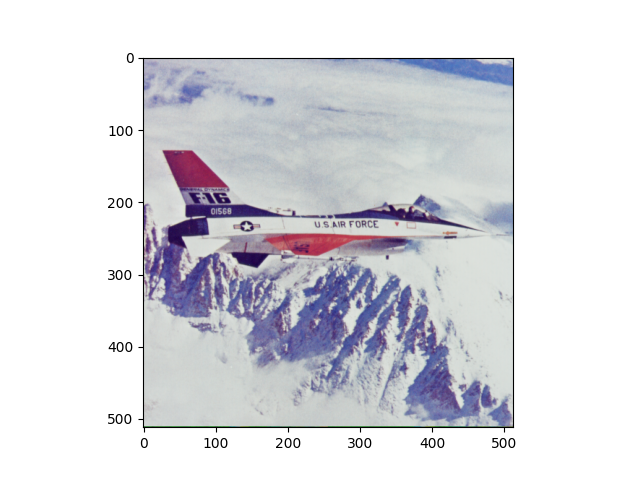

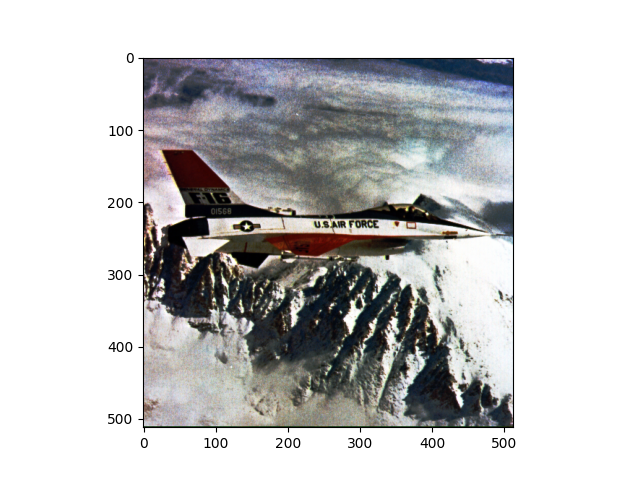

In [19]:

# RAZ (figures closing)
plt.close('all')

# image reading and display
im = plt.imread('../standard_test_images/jetplane.bmp')

# decomposition in R, G, B plans
imR = im[:,:,0]
imG = im[:,:,1]
imB = im[:,:,2]

# equalization of the plans 
imR = cv.equalizeHist(imR)
imG = cv.equalizeHist(imG)
imB = cv.equalizeHist(imB)

# concatenation of the 3 plans 
new_im = cv.merge((imR,imG,imB))

# display
plt.figure()
plt.imshow(im)
plt.figure()
plt.imshow(new_im)

## Image binarization

### Manual threshold

For the binarization of a gray level image,
the latter's histogram allows to find a threshold between histogram's modes.

Here we propose to binarize the _circuit.tif_ image in order to mask the card.

Load the _circuit.tif_ image, compute and visualise its histogram in order to choose a gray level between the mode of the circuit and that of the card.

By using _threshold()_ binarize the image and compute the correct binary image.
**Note:** 
In the boolean image get after binarization, the form (the object of interest)  should be represented by "1" values (so displayed in white), and the back-ground by "0" pixels (displayed in black).

Mask the original image and display the result.

**Question**: 
Why the boolean image is defined by such a way?  

**Response**:


(280, 272)
(280, 272)


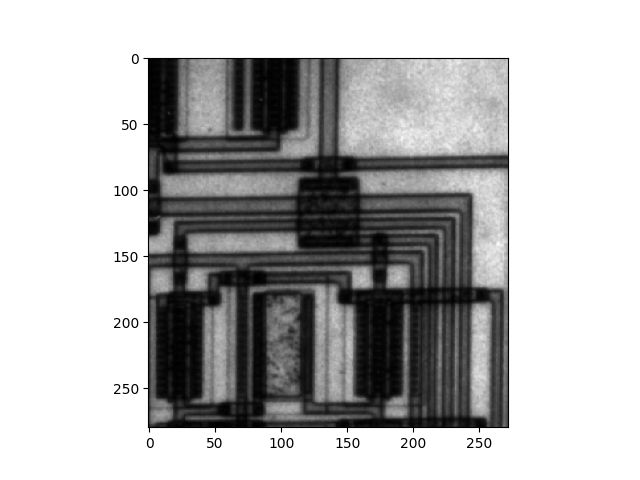

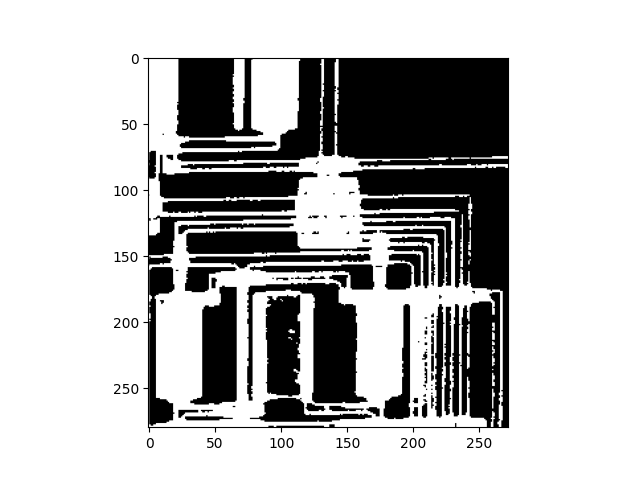

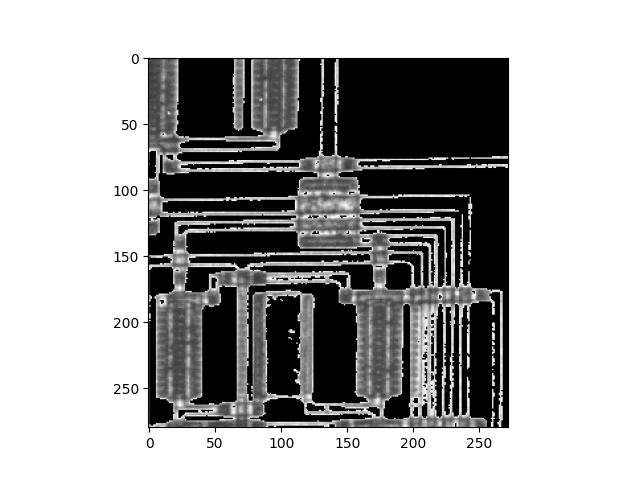

In [23]:
 
# RAZ (figures closing)
plt.close('all')

# image reading and display
im = plt.imread('../standard_test_images/circuit.png')

# display 
plt.figure()
plt.imshow(im, cmap="gray")
print(im.shape)

# threshold 
ret, im_bin = cv.threshold(im, 0.2, 1, cv.THRESH_BINARY_INV)
print(im_bin.shape)
# binarization
plt.figure()
plt.imshow(im_bin, cmap="gray")

# masking
im_masked = im * im_bin
plt.figure()
plt.imshow(im_masked, cmap="gray")

### Automatic threshold

Otsu's method determines an optimal global threshold value from the image histogram.

So use this method in order to binarize the _circuit.tif_ image (same exercice as before). 
Compare the 2 thresholds (manual vs. automatic). 

**Question:**

How the Otsu's method does work? 

**Response:**

Otsu's algorithm assumes that the image is bimodal.
It tries to find a threshold value $t$ which minimizes the weighted within-class variance...
It actually finds a value of $t$ which lies in between two peaks such that variances to both classes are minimal. 

Here, manual and automatix thresholds have close values.

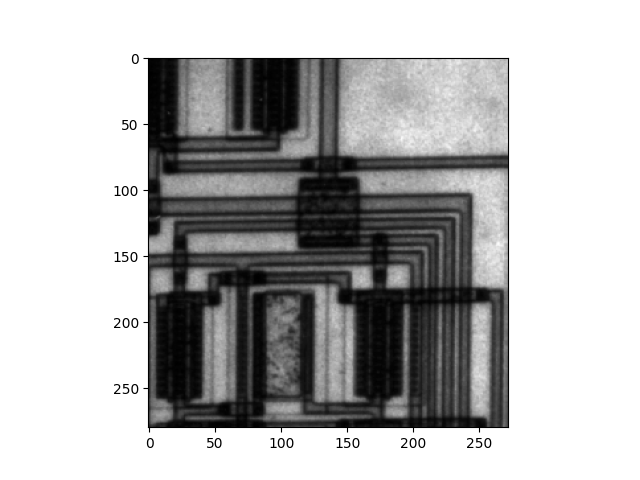

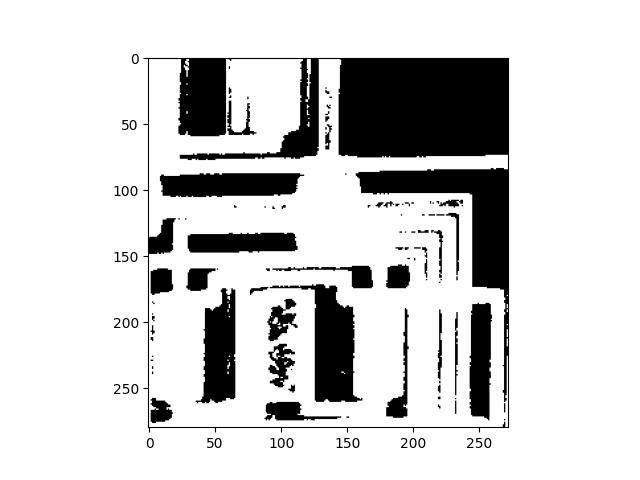

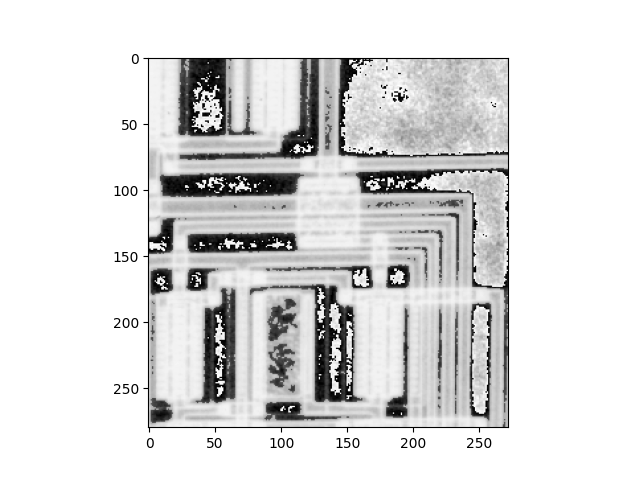

In [38]:

# RAZ (figures closing)
plt.close('all')

# image reading and display
im = plt.imread('../standard_test_images/circuit.png')
im = (im * 255).astype(np.uint8)

# display 
plt.figure()
plt.imshow(im, cmap="gray")

# binarization with automatic threshold
ret, im_bin = cv.threshold(im, 0.2, 1, cv.THRESH_OTSU)
im_bin = cv.bitwise_not(im_bin)
plt.figure()
plt.imshow(im_bin, cmap="gray")

# masking
im_masked = im * im_bin
plt.figure()
plt.imshow(im_masked, cmap="gray")